<a href="https://colab.research.google.com/github/JohanSH7/Proyecto_Mechanisms_of_Action-MoA-_Prediction/blob/main/%2001%20-%20Exploraci%C3%B3n%20de%20datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Descarga y lectura de los datos**

In [2]:
#Bibliotecas y librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gdown

In [3]:
# Enlaces directos a los archivos en Google Drive
urls = {
    'train_targets_scored': 'https://drive.google.com/uc?id=12majHautYikmbSBlN1qNyzlkp076rFc2',
    'train_features': 'https://drive.google.com/uc?id=1XKVyJT3LRgYXozASXo6WT0WNPhktfvaa',
    'test_features': 'https://drive.google.com/uc?id=1R2tc7jX5Vrt74XF9Gpeo6UAjrO06DXmn'
}

# Descargar y leer cada archivo
dfs = {}
for name, url in urls.items():
    output = f"{name}.csv"
    gdown.download(url, output, quiet=False)
    dfs[name] = pd.read_csv(output)

# Ahora dfs contiene los DataFrames correspondientes a cada archivo
Y = dfs['train_targets_scored']
X = dfs['train_features']
test = dfs['test_features']


Downloading...
From: https://drive.google.com/uc?id=12majHautYikmbSBlN1qNyzlkp076rFc2
To: /content/train_targets_scored.csv
100%|██████████| 10.1M/10.1M [00:00<00:00, 217MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XKVyJT3LRgYXozASXo6WT0WNPhktfvaa
To: /content/train_features.csv
100%|██████████| 156M/156M [00:00<00:00, 245MB/s]
Downloading...
From: https://drive.google.com/uc?id=1R2tc7jX5Vrt74XF9Gpeo6UAjrO06DXmn
To: /content/test_features.csv
100%|██████████| 26.1M/26.1M [00:00<00:00, 219MB/s]


# **Exploración de datos**

* Tamaño de los dataset

In [ ]:
print("Dataset train_targets_scored: " , Y.shape)
print("Dataset train_features: " , X.shape)
print("Dataset test_features: " , test.shape)

Dataset train_targets_scored:  (23814, 207)
Dataset train_features:  (23814, 876)
Dataset test_features:  (3982, 876)


* Valores faltantes en las columnas

In [ ]:
k =  X.isna().sum()
print(k[k!=0])

Series([], dtype: int64)


No se encontraron valores nulos o datos faltantes.

* Observamos el tipo de dato que se almacena en cada columna

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 876 entries, sig_id to c-99
dtypes: float64(872), int64(1), object(3)
memory usage: 159.2+ MB


In [ ]:
X.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
X.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
sig_id,23814,23814,id_000644bb2,1
cp_type,23814,2,trt_cp,21948
cp_dose,23814,2,D1,12147


La mayoria de los datos son de tipo float, esto explica que vamos a estar analizando datos de expresión génica y viabilidad celular, es decir que el modelo identificará cómo un fármaco específico afecta a las células a nivel molecular.

In [ ]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, sig_id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


In [ ]:
Y.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


"Y" es nuestra variable objetivo, que en realidad nos podemos dar cuenta que nuestra variable objetivo y lo que vamos a predecir, realmente son 206 valores. Ya que un farmaco tiene multiples mecanismos de accion la predicción para cada uno será independiente. En resumen, el problema de clasificacion multiple.

* Datos duplicados

In [ ]:
# Identificar filas duplicadas
duplicados = X.duplicated()

# Imprimir las filas duplicadas, mostrando cada columna
print(X[duplicados])

Empty DataFrame
Columns: [sig_id, cp_type, cp_time, cp_dose, g-0, g-1, g-2, g-3, g-4, g-5, g-6, g-7, g-8, g-9, g-10, g-11, g-12, g-13, g-14, g-15, g-16, g-17, g-18, g-19, g-20, g-21, g-22, g-23, g-24, g-25, g-26, g-27, g-28, g-29, g-30, g-31, g-32, g-33, g-34, g-35, g-36, g-37, g-38, g-39, g-40, g-41, g-42, g-43, g-44, g-45, g-46, g-47, g-48, g-49, g-50, g-51, g-52, g-53, g-54, g-55, g-56, g-57, g-58, g-59, g-60, g-61, g-62, g-63, g-64, g-65, g-66, g-67, g-68, g-69, g-70, g-71, g-72, g-73, g-74, g-75, g-76, g-77, g-78, g-79, g-80, g-81, g-82, g-83, g-84, g-85, g-86, g-87, g-88, g-89, g-90, g-91, g-92, g-93, g-94, g-95, ...]
Index: []

[0 rows x 876 columns]


No hay datos duplicados

* Debido a la alta dimensionalidad es complicado realizar graficos para nuestras variables de salida, para las variables de entrada podemos usar algunas columnas representativas

Analisis grafico de las variables de entrada

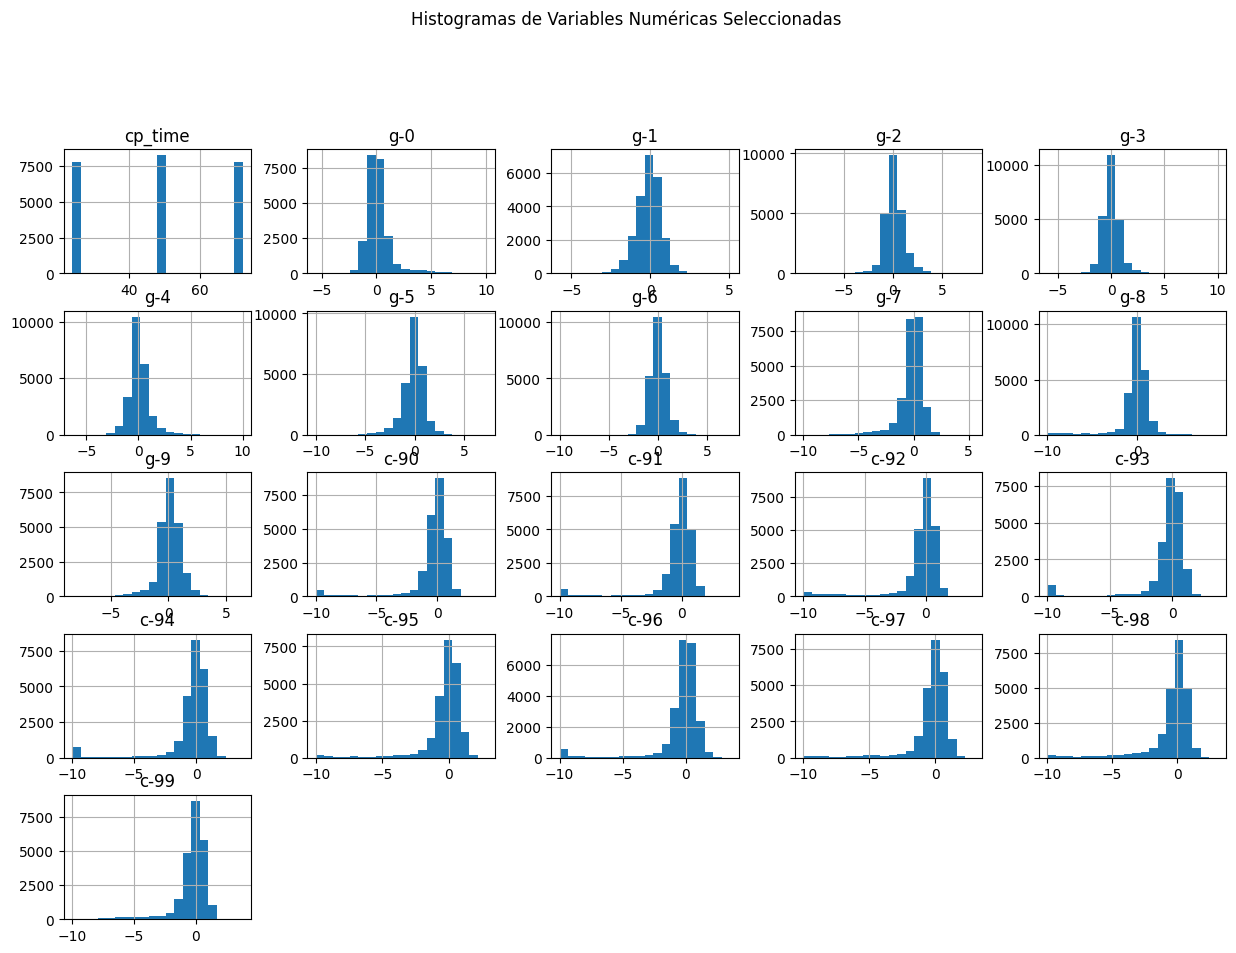

In [ ]:
# Seleccionar las primeras 14 columnas y las últimas 10 columnas de expresión génica y viabilidad celular
selected_columns = X.iloc[:, :14].join(X.iloc[:, -10:])

# Histogramas de Variables Numéricas Seleccionadas
selected_columns.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogramas de Variables Numéricas Seleccionadas', y=1.02)
plt.show()

<ipython-input-65-a8be0204cd33>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_columns.corr()


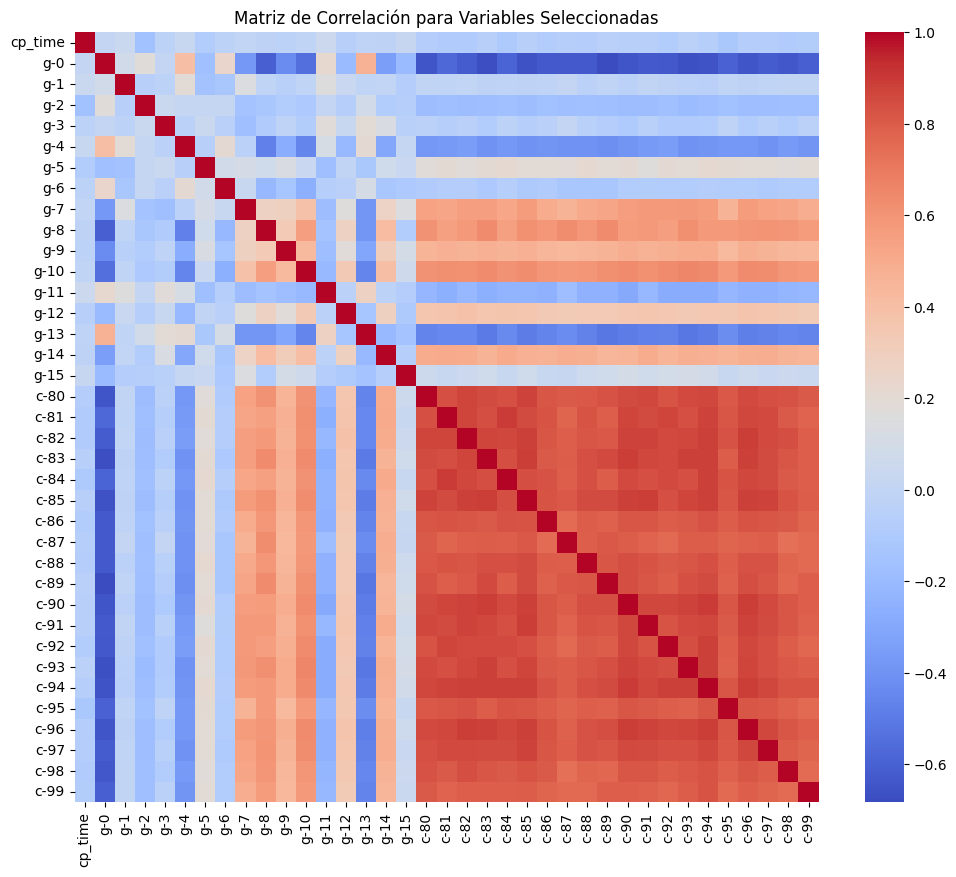

In [ ]:
# Matriz de Correlación para Variables Seleccionadas
selected_columns = X.iloc[:, 1:20].join(X.iloc[:, -20:])
correlation_matrix = selected_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title('Matriz de Correlación para Variables Seleccionadas')
plt.show()

La correlacion en las variables de viabilidad celular tienen una relacion mas fuerte que las de expresion genetica

In [ ]:
X._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
cp_time,23814.0,48.020156,19.402807,24.000,24.000000,48.00000,72.000000,72.000
g-0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g-1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g-2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g-3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
...,...,...,...,...,...,...,...,...
c-95,23814.0,-0.353726,1.629291,-10.000,-0.567975,-0.01025,0.444750,2.814
c-96,23814.0,-0.463485,2.059725,-10.000,-0.552575,-0.00125,0.465225,3.505
c-97,23814.0,-0.378241,1.703615,-10.000,-0.561000,-0.00680,0.446400,2.924
c-98,23814.0,-0.470252,1.834828,-10.000,-0.592600,0.01400,0.461275,3.111


Analisis de las variables de salida

In [ ]:
Y._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
5-alpha_reductase_inhibitor,23814.0,0.000714,0.026709,0.0,0.0,0.0,0.0,1.0
11-beta-hsd1_inhibitor,23814.0,0.000756,0.027483,0.0,0.0,0.0,0.0,1.0
acat_inhibitor,23814.0,0.001008,0.031731,0.0,0.0,0.0,0.0,1.0
acetylcholine_receptor_agonist,23814.0,0.007979,0.088967,0.0,0.0,0.0,0.0,1.0
acetylcholine_receptor_antagonist,23814.0,0.012640,0.111716,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
ubiquitin_specific_protease_inhibitor,23814.0,0.000252,0.015871,0.0,0.0,0.0,0.0,1.0
vegfr_inhibitor,23814.0,0.007139,0.084190,0.0,0.0,0.0,0.0,1.0
vitamin_b,23814.0,0.001092,0.033025,0.0,0.0,0.0,0.0,1.0
vitamin_d_receptor_agonist,23814.0,0.001638,0.040436,0.0,0.0,0.0,0.0,1.0


# **Procesamiento de los datos**

Debido a la ausencia de variables categoricas y de valores faltantes, podriamos inferir que al eliminar un 5% de los datos en al menos 3 columnas equivale a eliminar 2 o 3 columnas del dataset. Este procedimiento podria realizarse en las columnas de expresion genetica, ya que no contienen alguna correlacion importante para el modelo. Esto se hace para cumplir con los requisitos del dataset.

In [13]:
def preprocess_dataset(dataset):
    # Eliminar columnas
    dataset_mod = dataset.drop(['g-0', 'g-4', 'g-13'], axis=1)

    # Convertir variables tipo object a categorías
    object_columns = dataset_mod.select_dtypes(include='object').columns
    dataset_mod[object_columns] = dataset_mod[object_columns].astype('category')
    print("\nInformación del Dataset Modificado:")
    print(dataset_mod.info())

    return dataset_mod

X_mod = preprocess_dataset(X)


Información del Dataset Modificado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 873 entries, sig_id to c-99
dtypes: category(3), float64(869), int64(1)
memory usage: 158.8 MB
None


Las columnas que se elimiron se escogieron de esa forma debido a que eran las que menos correlacion tenian con respecto a las demas variables.